In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
from IPython.display import display

# Загрузка данных из CSV файла
file_path = '/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Вывод первых пяти строк в красивом формате
display(df.head())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
# Список категориальных параметров
categorical_columns = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Изменяем тип данных на object для категориальных параметров
df[categorical_columns] = df[categorical_columns].astype('object')

# Проверяем результат
print(df.dtypes)


In [ ]:
# Преобразуем BMI в категориальные значения
bmi_mapping = {
    '(11.999, 25.0]': 0,
    '(25.0, 29.0]': 1,
    '(29.0, 33.0]': 2,
    '(33.0, 98.0]': 3
}

# Применяем преобразование
df['BMI_category'] = pd.cut(
    df['BMI'], 
    bins=[11.999, 25.0, 29.0, 33.0, 98.0],
    labels=[0, 1, 2, 3]
).astype('category')

# Проверяем результат
print(df['BMI_category'].value_counts())

In [ ]:
#Five point summary for the numerical columns in the dataset

df.describe().T

In [ ]:
# Проверка на пустые ячейки
null_values = df.isnull().sum()

# Вывод количества пустых ячеек в каждом столбце
print(null_values)

# Важность признаков

## ANOVA 

Влияние категориальным признаков на целевую переменную

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Определяем категориальные и числовые признаки
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category']
# numeric_features = ['BMI']

# Преобразуем категориальные признаки в тип 'category', если необходимо
df[categorical_features] = df[categorical_features].astype('category')

# ANOVA для категориальных признаков
print("ANOVA для категориальных признаков:")
for cat_feature in categorical_features:
    # Группируем данные по категориальному признаку и извлекаем значения для переменной 'Diabetes_binary'
    grouped_data = [group['Diabetes_binary'].values for name, group in df.groupby(cat_feature, observed=False)]
    
    # Выполняем ANOVA
    f_stat, p_value = f_oneway(*grouped_data)
    
    # Выводим результаты
    print(f"Признак: {cat_feature}")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")
    print("-" * 40)


Высокие значения F-statistic показывают, что параметры, такие как HighBP, HighChol, HeartDiseaseorAttack, Stroke, GenHlth, DiffWalk и другие, оказывают значительное влияние на вероятность заболевания диабетом. Чем выше значение F-статистики, тем больше различий в среднем значении целевой переменной (диабет) среди различных категорий этого признака. 

Это говорит о том, что высокое кровяное давление, проблемы с ходьбой, высокий уровень холестерина, общее состояние здоровья и наличие сердечных заболеваний оказывают наибольшее влияние на определение диабета.

Низкие p-value (особенно p-value близкое к 0, например, 0.0000e+00) подтверждают, что связь между этими признаками и целевой переменной является статистически значимой: HighBP, HeartDiseaseorAttack, GenHlth. Это означает, что существует высокая вероятность того, что различия между категориями этих признаков не случайны.

## CORRELATION

In [ ]:
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category']

# Рассчитываем средние значения num для категориальных признаков
categorical_influence_means = {}
for cat_feature in categorical_features:
    if cat_feature in df.columns:  # Проверяем, существует ли категориальный признак
        categorical_influence_means[cat_feature] = df.groupby(cat_feature, observed=False)['Diabetes_binary'].mean()
    else:
        print(f"Категориальный признак '{cat_feature}' не найден в данных.")

# Рассчитываем корреляцию категориальных признаков с num
categorical_correlations = {}
for cat_feature in categorical_features:
    if cat_feature in df.columns:  # Проверяем, существует ли категориальный признак
        categorical_correlations[cat_feature] = df[cat_feature].astype('category').cat.codes.corr(df['Diabetes_binary'])

# Выводим результаты
print("\nСредние значения num для категориальных признаков:")
for cat_feature, means in categorical_influence_means.items():
    print(f"\nКатегориальный признак '{cat_feature}':")
    print(means)

# Сортировка категориальных признаков по корреляции от наибольшего к наименьшему
sorted_correlations = sorted(categorical_correlations.items(), key=lambda x: x[1], reverse=True)

# Вывод отсортированных корреляций
print("\nКорреляция категориальных признаков с num (от наибольшего к наименьшему):")
for cat_feature, correlation in sorted_correlations:
    print(f"{cat_feature}: {correlation}")


Признаки с наибольшими корреляциями (например, GenHlth, HighBP, BMI_category, HighChol) показывают значительное влияние на наличие диабета.

Признаки с отрицательными корреляциями (например, PhysActivity, Education, Income) имеют слабое или умеренное влияние на вероятность диабета, в некоторых случаях улучшая состояние (например, физическая активность может снижать вероятность диабета).

## PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Устанавливаем максимальное количество строк для отображения
pd.set_option('display.max_rows', 100)

# Определяем категориальные признаки (исключаем 'Diabetes_binary' как целевую переменную)
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category']

# Преобразуем категориальные признаки в числовые с помощью One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Создаем новые столбцы для средних значений по каждой группе категориальных признаков
df_encoded['avg_HighBP'] = df_encoded.filter(like='HighBP_').mean(axis=1)
df_encoded['avg_HighChol'] = df_encoded.filter(like='HighChol_').mean(axis=1)
df_encoded['avg_CholCheck'] = df_encoded.filter(like='CholCheck_').mean(axis=1)
df_encoded['avg_Smoker'] = df_encoded.filter(like='Smoker_').mean(axis=1)
df_encoded['avg_Stroke'] = df_encoded.filter(like='Stroke_').mean(axis=1)
df_encoded['avg_HeartDiseaseorAttack'] = df_encoded.filter(like='HeartDiseaseorAttack_').mean(axis=1)
df_encoded['avg_PhysActivity'] = df_encoded.filter(like='PhysActivity_').mean(axis=1)
df_encoded['avg_Fruits'] = df_encoded.filter(like='Fruits_').mean(axis=1)
df_encoded['avg_Veggies'] = df_encoded.filter(like='Veggies_').mean(axis=1)
df_encoded['avg_HvyAlcoholConsump'] = df_encoded.filter(like='HvyAlcoholConsump_').mean(axis=1)
df_encoded['avg_AnyHealthcare'] = df_encoded.filter(like='AnyHealthcare_').mean(axis=1)
df_encoded['avg_NoDocbcCost'] = df_encoded.filter(like='NoDocbcCost_').mean(axis=1)
df_encoded['avg_GenHlth'] = df_encoded.filter(like='GenHlth_').mean(axis=1)
df_encoded['avg_MentHlth'] = df_encoded.filter(like='MentHlth_').mean(axis=1)
df_encoded['avg_PhysHlth'] = df_encoded.filter(like='PhysHlth_').mean(axis=1)
df_encoded['avg_DiffWalk'] = df_encoded.filter(like='DiffWalk_').mean(axis=1)
df_encoded['avg_Sex'] = df_encoded.filter(like='Sex_').mean(axis=1)
df_encoded['avg_Age'] = df_encoded.filter(like='Age_').mean(axis=1)
df_encoded['avg_Education'] = df_encoded.filter(like='Education_').mean(axis=1)
df_encoded['avg_Income'] = df_encoded.filter(like='Income_').mean(axis=1)
df_encoded['avg_BMI_category'] = df_encoded.filter(like='BMI_category_').mean(axis=1)

# Выбираем только интересующие признаки, включая средние значения
selected_features = [col for col in df_encoded.columns if col not in categorical_features]
df_encoded = df_encoded[selected_features]

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Применяем PCA для сокращения размерности
pca = PCA(n_components=6)  # Указываем желаемое количество компонент
X_pca = pca.fit_transform(X_scaled)

# Рассчитываем важность признаков по первой главной компоненте
feature_importance = pd.DataFrame({
    'Feature': df_encoded.columns,
    'Importance_PCA': pca.components_[0]  # Важность по первой главной компоненте
})

# Сортируем по важности
feature_importance = feature_importance.sort_values(by='Importance_PCA', ascending=False)

# Фильтруем только те строки, где названия признаков содержат 'avg_' для средних значений
avg_feature_importance = feature_importance[feature_importance['Feature'].str.contains('avg_')]

# Выводим важность средних значений признаков
print("Важность средних значений признаков по первой главной компоненте:")
print(avg_feature_importance)

# Выводим долю объясненной дисперсии для каждой главной компоненты
print("\nДоля объясненной дисперсии для каждой главной компоненты:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"Главная компонента {i + 1}: {variance:.4f}")


Наиболее важными признаками для модели являются DiffWalk, HighBP, и GenHlth, так как они имеют наибольшие значения важности. Эти признаки, вероятно, оказывают значительное влияние на модель, в отличие от таких признаков как Veggies или PhysActivity, которые имеют меньшую важность.

Если рассматривать главные компоненты, то можно сказать, что первая компонента — наиболее значимая, так как она объясняет наибольшую долю вариации данных.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Определяем категориальные признаки
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category']

# Преобразуем категориальные признаки в числовые с помощью Label Encoding (для совместного анализа категорий)
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Выбираем только категориальные признаки
X_categorical = df[categorical_features]

# Стандартизируем данные
scaler = StandardScaler()
X_categorical_scaled = scaler.fit_transform(X_categorical)

# Применяем PCA для сокращения размерности
pca_categorical = PCA(n_components=min(X_categorical.shape[1], X_categorical.shape[0]))
X_categorical_pca = pca_categorical.fit_transform(X_categorical_scaled)

# Рассчитываем важность признаков
categorical_importance = pd.DataFrame({
    'Feature': categorical_features,
    'Importance_PCA': pca_categorical.components_[0]  # Важность по первой главной компоненте
})

# Сортируем по важности
categorical_importance = categorical_importance.sort_values(by='Importance_PCA', ascending=False)

# Выводим важность признаков
print("Важность категориальных признаков по первой главной компоненте:")
print(categorical_importance)

# Выводим долю объясненной дисперсии для каждой главной компоненты
print("\nДоля объясненной дисперсии для каждой главной компоненты:")
for i, variance in enumerate(pca_categorical.explained_variance_ratio_):
    print(f"Главная компонента {i + 1}: {variance:.4f}")

Код анализирует только взаимосвязи между категориальными признаками (которые после Label Encoding преобразуются в числовые значения) и то, как они влияют на основные компоненты данных.

## XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Определяем категориальные признаки
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                        'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category']

# Преобразуем категориальные признаки в числовые с помощью One-Hot Encoding
encoder = OneHotEncoder(drop='first')
encoded_categorical = encoder.fit_transform(df[categorical_features]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Создаем DataFrame для закодированных категориальных признаков
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)

# Транспонируем DataFrame, чтобы работать с группировкой по столбцам
grouped_df = encoded_df.T.groupby(encoded_df.columns.str.split('_').str[0], axis=0).mean().T

# Объединяем закодированные категориальные признаки и целевую переменную
X = grouped_df
y = df['Diabetes_binary']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Получаем важность признаков
importance = model.feature_importances_

# Создаем DataFrame с важностью признаков
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Сортируем DataFrame по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим важность признаков
print("\nВажность категориальных признаков с помощью XGBoost:")
print(importance_df)

# # Для визуализации важности признаков можно использовать метод plot_importance
# import xgboost as xgb
# xgb.plot_importance(model, importance_type='weight')


Наиболее важные категориальные признаки - HighBP, GenHlth и DiffWalk

In [ ]:
# Визуализация важности признаков с помощью XGBoost
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=20, height=0.8)
plt.title("Важность признаков с помощью XGBoost")
plt.show()

## Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Выбираем только столбцы, содержащие средние значения (avg_) и целевую переменную из df
selected_features = [col for col in df_encoded.columns if col.startswith('avg_')]  # Только avg_ признаки

# Создаем DataFrame с выбранными признаками из df_encoded
df_selected = df_encoded[selected_features]

# Добавляем целевую переменную из исходного DataFrame df
df_selected['Diabetes_binary'] = df['Diabetes_binary']

# Убедимся, что целевая переменная имеет правильный тип
y = df_selected['Diabetes_binary']  # Целевая переменная
X = df_selected.drop('Diabetes_binary', axis=1)  # Признаки

# Преобразуем y в целые числа, если это необходимо
y = y.astype(int)

# Проверим, есть ли пропуски в признаках или целевой переменной
if y.isnull().any():
    print("Есть пропуски в целевой переменной. Заменим их на 0.")
    y.fillna(0, inplace=True)  # Пример, заменяем NaN на 0

# Проверяем наличие пропусков в признаках
if X.isnull().any().any():
    print("Есть пропуски в признаках. Заменим их на 0.")
    X.fillna(0, inplace=True)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Получаем важность признаков
importance = rf_model.feature_importances_

# Создаем DataFrame с важностью признаков
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Сортируем DataFrame по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим 10 наиболее значимых признаков
print("\n10 наиболее значимых признаков с помощью Random Forest:")
print(importance_df.head(10))

# Для визуализации важности признаков
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.xlabel('Важность признака')
plt.title('10 наиболее значимых признаков с помощью Random Forest')
plt.show()

Наиболее важные категориальные признаки - HighBP, GenHlth и HighChol

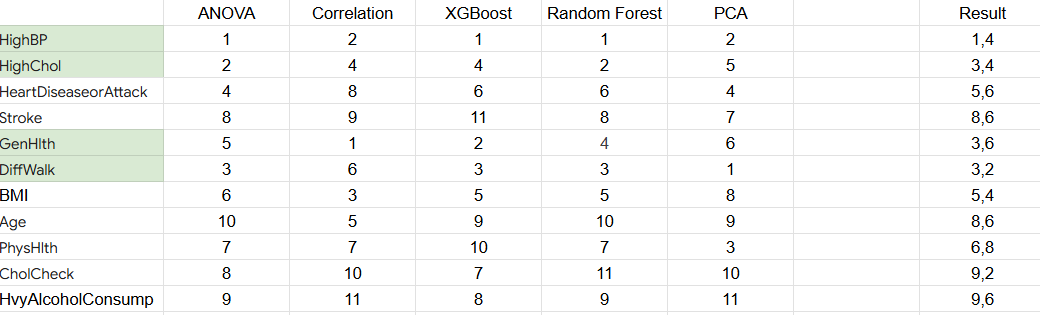
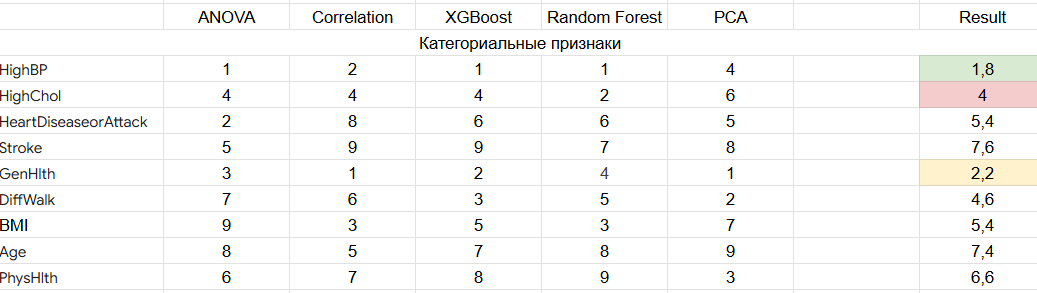